### Attending to different parts of the input with self-attention

#### A simple self-attention mechanism without trainable weights

In [168]:
import torch

# building 3 dimesional input vectors of a sentence
inputs= torch.tensor([
 [0.43, 0.15, 0.89], # Your (x^1)
 [0.55, 0.87, 0.66], # journey (x^2)
 [0.57, 0.85, 0.64], # starts (x^3)
 [0.22, 0.58, 0.33], # with (x^4)
 [0.77, 0.25, 0.10], # one (x^5)
 [0.05, 0.80, 0.55]  # step (x^6)
 ])

attention scores are calculated before attention weights. these are non-normalized version of attention weights

these are computed as the dot product between  an input [ex-> the embedding vector of a particular input token] with the entire embedding vectors of all the words


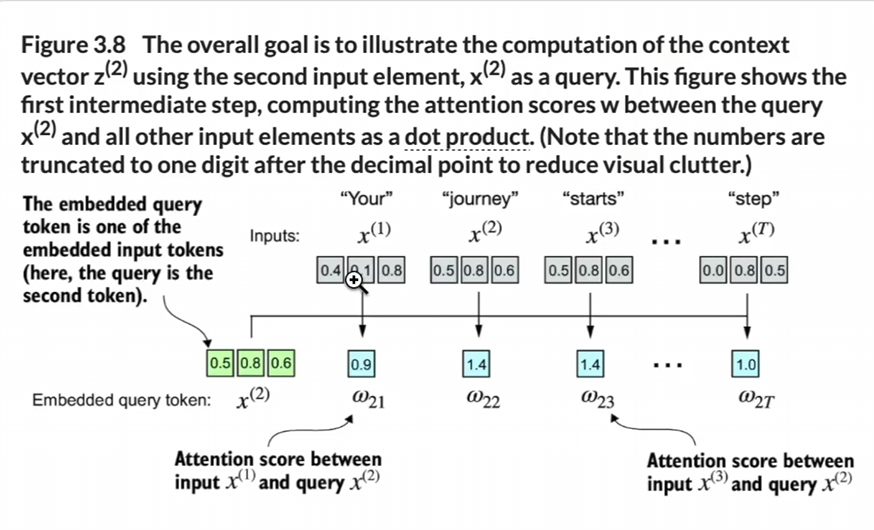

lets compute the alpha values-> attention weights

In [169]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [170]:
input_query=inputs[1] # this is the embedding vector of the word "journey" (x^2)
input_query

tensor([0.5500, 0.8700, 0.6600])

In [171]:
input_1=inputs[0] # this is the embedding vector of the word "Your" (x^1)
input_1

tensor([0.4300, 0.1500, 0.8900])

In [172]:
0.5500*0.4300 + 0.8700*0.1500 + 0.6600*0.8900
# this is the dot product between the embedding vector of "journey" and "Your"

0.9544

In [173]:
torch.dot(input_query, input_1)

tensor(0.9544)

we do it for all the input words with the input sequence

In [174]:
import torch

# building 3 dimesional input vectors of a sentence
inputs= torch.tensor([
 [0.43, 0.15, 0.89], # Your (x^1)
 [0.55, 0.87, 0.66], # journey (x^2)
 [0.57, 0.85, 0.64], # starts (x^3)
 [0.22, 0.58, 0.33], # with (x^4)
 [0.77, 0.25, 0.10], # one (x^5)
 [0.05, 0.80, 0.55]  # step (x^6)
 ])

Now we want to do the dot product of each x^i with the input_query, to get the attention scores

then append them into a list 

In [175]:
inputs.shape

torch.Size([6, 3])

In [176]:
query= inputs[1] # this is the embedding vector of the word "journey" (x^2)
query.shape

torch.Size([3])

In [177]:
# this is a measure of similarity.
# how similar are the embedding vectors of the input words to the input query?
query= inputs[1] 

attn_scores_2= torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(query, x_i) 

attn_scores_2

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])

In [178]:
# now we will normalize these numbers 
# so we dont get crazy big numbers

attn_weights_2_tmp= attn_scores_2 / torch.sum(attn_scores_2)
attn_weights_2_tmp

tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])

In [179]:
attn_weights_2_tmp.sum()

tensor(1.0000)

There is a better way to normalize our vectors. Using Softmax

In [180]:
# self implemented softmax
# not very efficient
def softmax_naive(x):
    return torch.exp(x)/torch.exp(x).sum(dim=0)
softmax_naive(attn_scores_2)

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

use the pytorch version of softmax

In [181]:
attn_weights_2= torch.softmax(attn_scores_2, dim=0)
attn_weights_2.sum(), attn_weights_2

(tensor(1.), tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581]))

we have calculated the attention weights. This is the alpha of each token with respect to our query vector

To get the context vector-> Multiply each `input vector` with the corresponding attention weight[`alpha`]

and then do the weighted sum

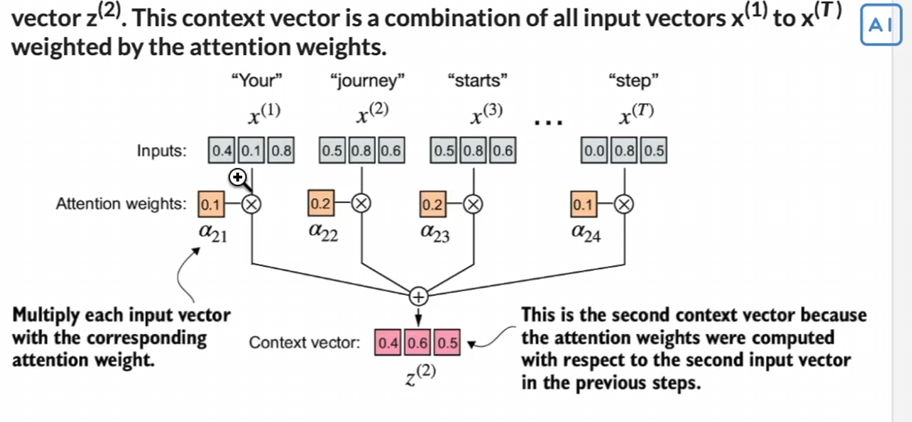

with respect to the query: `inputs[1]`, we will find the weighted sum of this to the whole sentence.

given the attention weights of inputs[1]->
* multiply each attention weight with the input embeddings of each token. 
* sum them all. 
* to get context vector of size of query.

In [182]:
attn_weights_2

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

In [183]:
query= inputs[1]

context_vec_2= torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
    print(f"{attn_weights_2[i]}----->{inputs[i]}")
    context_vec_2+= attn_weights_2[i]* inputs[i]

print("\nContext Vector of second Token: ",context_vec_2)

0.13854756951332092----->tensor([0.4300, 0.1500, 0.8900])
0.2378913015127182----->tensor([0.5500, 0.8700, 0.6600])
0.23327402770519257----->tensor([0.5700, 0.8500, 0.6400])
0.12399158626794815----->tensor([0.2200, 0.5800, 0.3300])
0.10818186402320862----->tensor([0.7700, 0.2500, 0.1000])
0.15811361372470856----->tensor([0.0500, 0.8000, 0.5500])

Context Vector of second Token:  tensor([0.4419, 0.6515, 0.5683])


Lets do the context vectors for all the rest of the tokens in the sentence as well

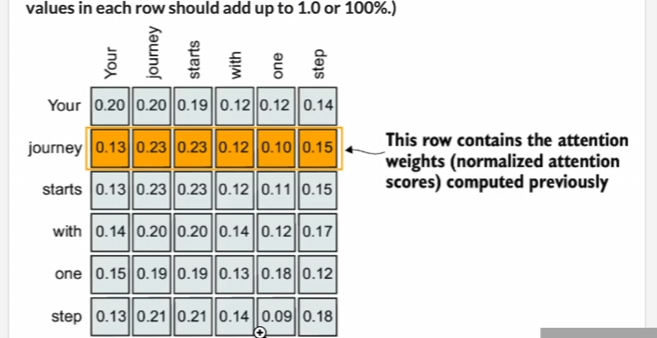

In [184]:
import torch

# building 3 dimesional input vectors of a sentence
inputs= torch.tensor([
 [0.43, 0.15, 0.89], # Your (x^1)
 [0.55, 0.87, 0.66], # journey (x^2)
 [0.57, 0.85, 0.64], # starts (x^3)
 [0.22, 0.58, 0.33], # with (x^4)
 [0.77, 0.25, 0.10], # one (x^5)
 [0.05, 0.80, 0.55]  # step (x^6)
 ]) 

In [185]:
# initialize a matrix to hold attention scores
attn_scores= torch.empty(6,6)   

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i,j]= torch.dot(x_i, x_j)

attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

there is a better way to do this.

since we are simply multiplying the matrix with its transpose

In [186]:
inputs.T

tensor([[0.4300, 0.5500, 0.5700, 0.2200, 0.7700, 0.0500],
        [0.1500, 0.8700, 0.8500, 0.5800, 0.2500, 0.8000],
        [0.8900, 0.6600, 0.6400, 0.3300, 0.1000, 0.5500]])

In [187]:
attn_scores= inputs @ inputs.T
attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

Do the normalization of the attention scores

In [188]:
attn_weights= torch.softmax(attn_scores, dim=1)
attn_weights
# applying across columns, such that the sum of each row is 1


tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

now getting the context vectors

In [189]:
inputs


tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [190]:
all_context_vecs= attn_weights @ inputs
all_context_vecs

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])

In [191]:
# puttint it all together
attn_scores= inputs@ inputs.T
attn_weights= torch.softmax(attn_scores, dim=1)
context_vectors= attn_weights @ inputs
context_vectors

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])

### Imlementing self Attention with trainable weights

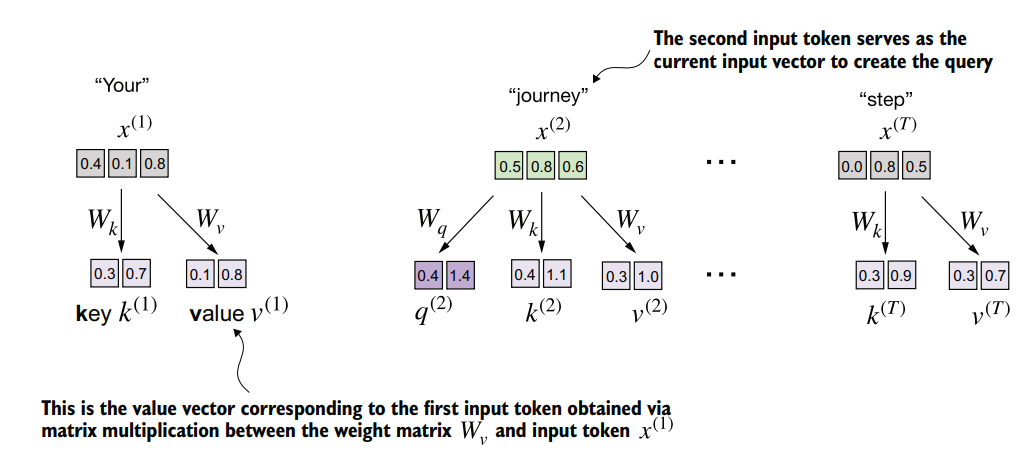

Introducing 3 trainable parameters:
-> The input embedding is projected into 3 weight matrices
* W-k :  The key is like a database key used for indexing and searching In the attention mechanism, each token has an associated key. These keys are used to match the query.
* W-q :  Similar to the search query in a database. It represents the current item (e.g., a word or token in a sentence) the model focuses on or tries to understand
* W-v :  The value in this context is similar to the value in a key-value pair in a database. It represents the actual content or representation of the input items

In [192]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [193]:
inputs.shape

torch.Size([6, 3])

torch.rand-> generates numbers from a uniform distribution in the range [0, 1)

torch.randn()-> generates numbers from a standard normal (Gaussian) distribution with a mean of 0 and a variance of 1.

In [194]:
import torch
x_2= inputs[1]
d_in=inputs.shape[1]
d_out= 2

# initialize the 3 matrices-> Wq, Wk, Wv
torch.manual_seed(123)
W_query= torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key= torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value= torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

# setting grad= false, to reduce clutter for now

query_2= x_2 @ W_query
key_2= x_2 @ W_key
value_2= x_2 @ W_value

In [195]:
W_query, W_key, W_value

(Parameter containing:
 tensor([[0.2961, 0.5166],
         [0.2517, 0.6886],
         [0.0740, 0.8665]]),
 Parameter containing:
 tensor([[0.1366, 0.1025],
         [0.1841, 0.7264],
         [0.3153, 0.6871]]),
 Parameter containing:
 tensor([[0.0756, 0.1966],
         [0.3164, 0.4017],
         [0.1186, 0.8274]]))

In [196]:
query_2, key_2, value_2
# projected vectors of x_2 from 3-dimensional space into 2-dimensional space

(tensor([0.4306, 1.4551]), tensor([0.4433, 1.1419]), tensor([0.3951, 1.0037]))

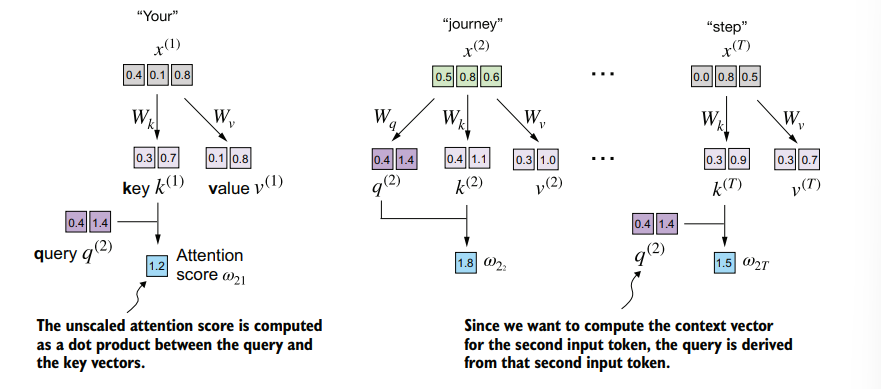

attention score is calculated using the key and the query vectors

In [197]:
# this is the attention score of the second token (x^2) with itself

attn_scores_22= query_2 @ key_2.T
attn_scores_22

tensor(1.8524)

In [198]:
keys= inputs @ W_key
queries= inputs @ W_query
values= inputs @ W_value
print("keys.shape:", keys.shape)
print("values.shape:", queries.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


In [199]:
attn_scores_2= query_2 @ keys.T
attn_scores_2

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])

In [200]:
# normalizing the attention scores
d_k= keys.shape[1]  # dimension of the key vectors
attn_weights_2= torch.softmax(attn_scores_2/d_k**0.5, dim=-1)
attn_weights_2.sum(), attn_weights_2, 

(tensor(1.), tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820]))

In [201]:
context_vec_2= attn_weights_2 @ values
context_vec_2

tensor([0.3061, 0.8210])

generalizing this over the entire matrix

In [202]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query= torch.nn.Parameter(torch.rand(d_in, d_out))
        self.W_key= torch.nn.Parameter(torch.rand(d_in, d_out))
        self.W_value= torch.nn.Parameter(torch.rand(d_in, d_out))

    def forward(self, x):
        queries= x @ self.W_query 
        keys= x @ self.W_key 
        value= x @ self.W_value 

        attn_scores= queries @ keys.T
        attn_weights= torch.softmax(attn_scores/d_k**0.5, dim=-1)
        context_vec= attn_weights @ values

        return context_vec 

torch.manual_seed(123)
sa_v1= SelfAttention_v1(d_in=3, d_out=2)
sa_v1(inputs)

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)

In [203]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

* sa_v1[0] -> is the context vector of token 0, keeping token 0 as the query vector.

* sa_v1[1] -> is the context vector of token 1, keeping token 1 as the query vector.

* sa_v1[2] -> is the context vector of token 2, keeping token 2 as the query vector.

and so on...

##### there is an even better way to implement this
using torch.linear

In [204]:
m=torch.nn.Linear(2,3)
m.weight, m.bias

(Parameter containing:
 tensor([[-0.1668,  0.2270],
         [ 0.5000,  0.1317],
         [ 0.1934,  0.6825]], requires_grad=True),
 Parameter containing:
 tensor([-0.3189,  0.2240, -0.3146], requires_grad=True))

In [205]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias= False):
        super().__init__()
        self.W_query= torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key= torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value= torch.nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        queries= self.W_query(x)                       # x @ self.W_query 
        keys= self.W_key(x) 
        value= self.W_value(x) 

        attn_scores= queries @ keys.T
        attn_weights= torch.softmax(attn_scores/d_k**0.5, dim=-1)
        context_vec= attn_weights @ values

        return context_vec 

torch.manual_seed(123)
sa_v1= SelfAttention_v1(d_in=3, d_out=2)
sa_v1(inputs)

tensor([[0.2821, 0.7652],
        [0.2829, 0.7635],
        [0.2829, 0.7635],
        [0.2815, 0.7595],
        [0.2816, 0.7613],
        [0.2818, 0.7599]], grad_fn=<MmBackward0>)

### Hiding future Words 

#### Applying causal attention mask

We want the LLM to see only the next Token. While training. So that it learns to predict the right tokens

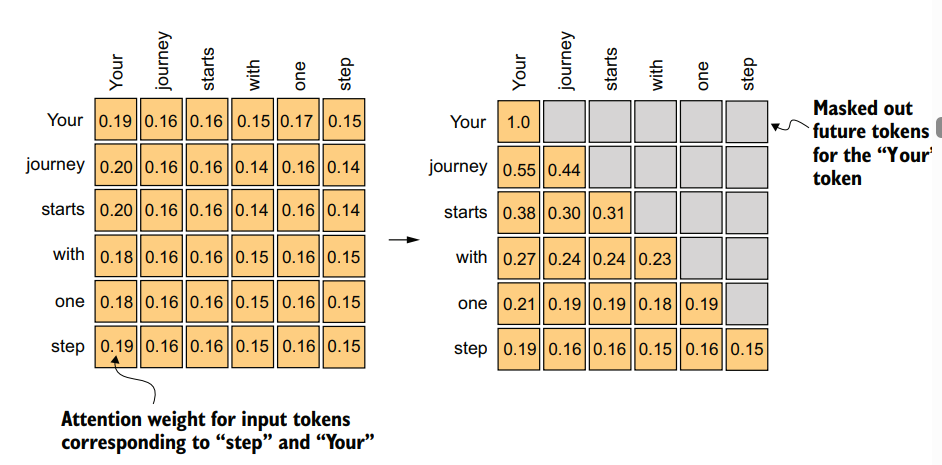

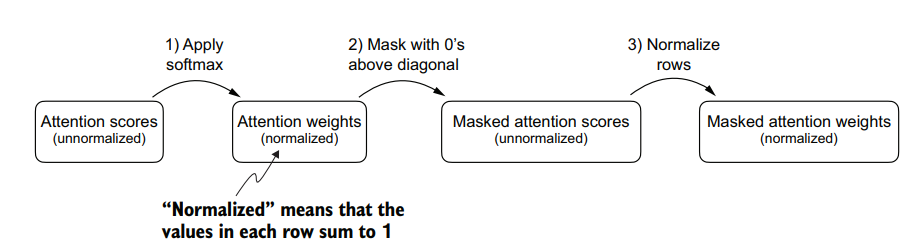

In [206]:
queries= sa_v1.W_query(inputs)                       # x @ self.W_query
keys= sa_v1.W_key(inputs)
values= sa_v1.W_value(inputs)

attn_scores= queries @ keys.T
# attention weights as in the yellow image above
attn_weights= torch.softmax(attn_scores/d_k**0.5, dim=-1)
attn_weights, attn_weights.shape

(tensor([[0.1717, 0.1762, 0.1761, 0.1555, 0.1627, 0.1579],
         [0.1636, 0.1749, 0.1746, 0.1612, 0.1605, 0.1652],
         [0.1637, 0.1749, 0.1746, 0.1611, 0.1606, 0.1651],
         [0.1636, 0.1704, 0.1702, 0.1652, 0.1632, 0.1674],
         [0.1667, 0.1722, 0.1721, 0.1618, 0.1633, 0.1639],
         [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
        grad_fn=<SoftmaxBackward0>),
 torch.Size([6, 6]))

In [207]:
context_length= attn_scores.shape[0]
mask_simple= torch.tril(torch.ones(context_length, context_length))
mask_simple


tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])

In [208]:
# multiply the attention scores with the mask
masked_simple= attn_scores * mask_simple
masked_simple

tensor([[0.3111, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1655, 0.2602, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.2602, 0.2577, 0.0000, 0.0000, 0.0000],
        [0.0510, 0.1080, 0.1064, 0.0643, 0.0000, 0.0000],
        [0.1415, 0.1875, 0.1863, 0.0987, 0.1121, 0.0000],
        [0.0476, 0.1192, 0.1171, 0.0731, 0.0477, 0.0966]],
       grad_fn=<MulBackward0>)

the sum of each value is not coming out to 1, so you have to normalize this now

In [209]:
row_sums= masked_simple.sum(dim=-1, keepdim=True)
masked_simple_norm= masked_simple/ row_sums
masked_simple_norm

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3888, 0.6112, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2435, 0.3801, 0.3764, 0.0000, 0.0000, 0.0000],
        [0.1547, 0.3275, 0.3227, 0.1950, 0.0000, 0.0000],
        [0.1949, 0.2582, 0.2565, 0.1360, 0.1544, 0.0000],
        [0.0950, 0.2377, 0.2337, 0.1458, 0.0952, 0.1927]],
       grad_fn=<DivBackward0>)

there is a better efficient way of computing the masked attention weight matrix. 
* first, take the attention scores (unnormalized)
* mask them -> get masked attention scores (unnormalized). [with - inf above the diagonal]
* THEN APPLY Softmax-> get masked attention WEIGHTS (normalized)

In [210]:
torch.exp(torch.tensor([-9999999]))

tensor([0.])

Dropout mask

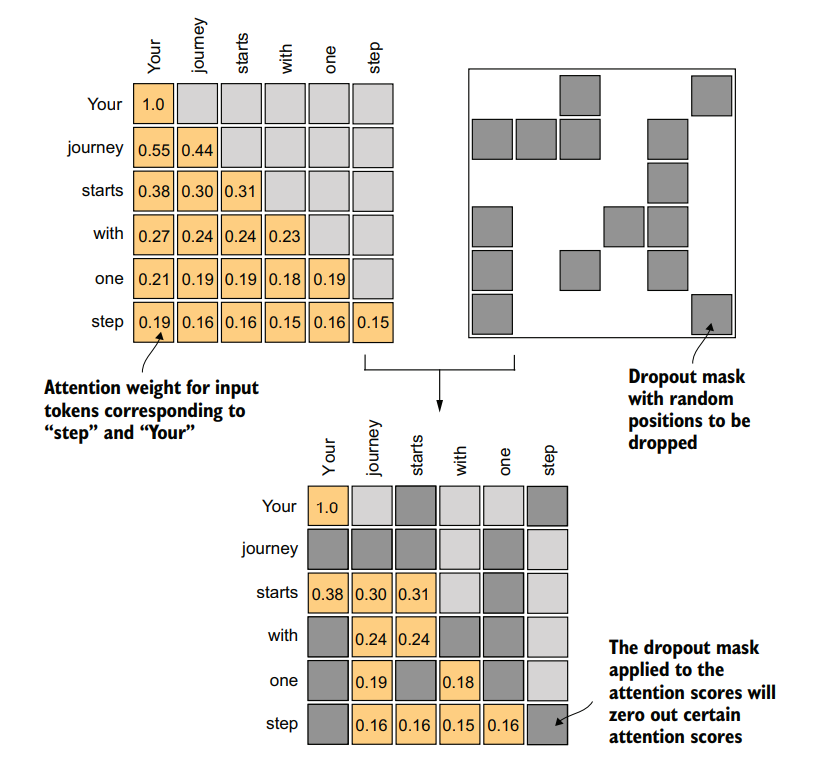

#### masking additional attention weights with dropout

In [211]:
torch.manual_seed(123)

layer= torch.nn.Dropout(0.5)
# 50 % are dropped out from the attention weights

# droput is not that prevalent these days. its just a random way of masking out random values


In [212]:
example=torch.ones(6,6)
example

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])

In [213]:
layer(example)

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])

values are rescaled-> so that we dont fuck with the original values when masking some of them.

In [214]:
# applying it to the attention weights
layer(attn_weights)

tensor([[0.3433, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.3492, 0.0000, 0.3210, 0.3303],
        [0.0000, 0.3498, 0.3492, 0.3223, 0.3211, 0.3302],
        [0.0000, 0.0000, 0.3403, 0.3304, 0.0000, 0.3349],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.3266, 0.3278],
        [0.3249, 0.3418, 0.0000, 0.3308, 0.3249, 0.3363]],
       grad_fn=<MulBackward0>)

now we have implemented causal attention mask and the causal attention mask to the attention weights matrix

### Implementing a compact causal self attention class

In [215]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

lets create batches, stack 2 inputs on tpop of each other

In [216]:
batch= torch.stack((inputs, inputs), dim=0)
batch.shape
# its 2 inputs on top of each other
# each inputs has 6 tokens, each token has 3 dimensions

torch.Size([2, 6, 3])

a compact causal attention class

In [217]:
import torch

# Create a sample tensor with shape [B, T, D]
x = torch.randn(2, 3, 4)

# Transpose dimensions 1 and 2
x_transposed = x.transpose(1, 2)

print("Original shape:", x.shape)
print("Transposed shape:", x_transposed.shape)
x_fin= x_transposed @ x
x_fin.shape

Original shape: torch.Size([2, 3, 4])
Transposed shape: torch.Size([2, 4, 3])


torch.Size([2, 4, 4])

In [218]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.d_out=d_out
        self.W_query= torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key= torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value= torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout= torch.nn.Dropout(dropout)
        self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))
    
    def forward(self, x):
        # b-> batch
        b, num_tokens, d_in= x.shape
        keys= self.W_key(x)             # (2, 6, 3)
        queries= self.W_query(x)
        values= self.W_value(x)

        attn_scores= queries @ keys.transpose(1, 2)         # swap the positions at 1,2
        # putting a -infinity mask on the upper triangle of the attention scores
        attn_scores.masked_fill_(self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights= self.dropout(attn_weights)

        context_vec= attn_weights @ values  
        return context_vec

torch.manual_seed(123)
ca_v2= CausalAttention(d_in=3, d_out=2, context_length=6, dropout=0)
ca_v2(batch)

tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)

both these are same as we duplicated our inputs

Implementing Multi Headed Attention Class

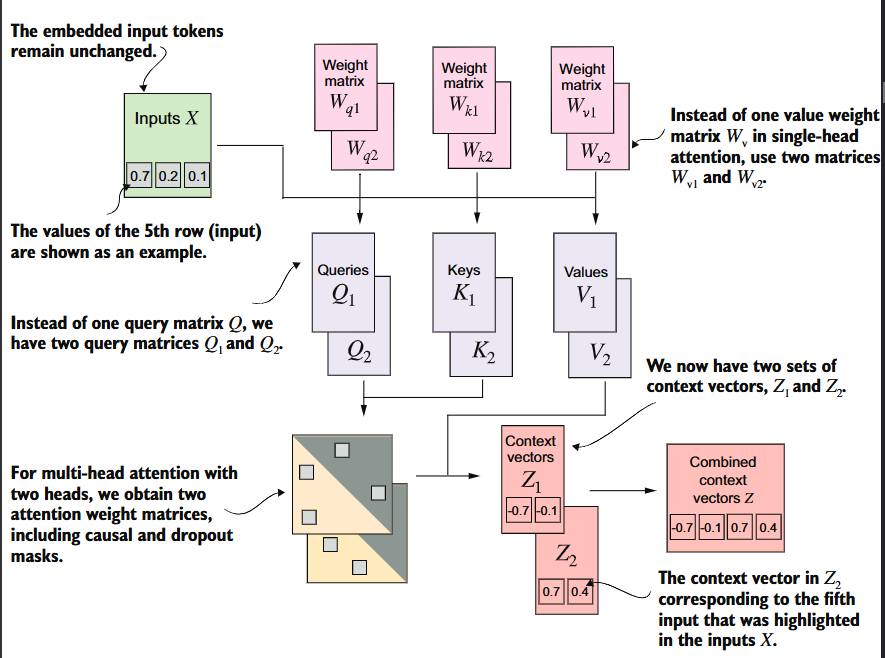

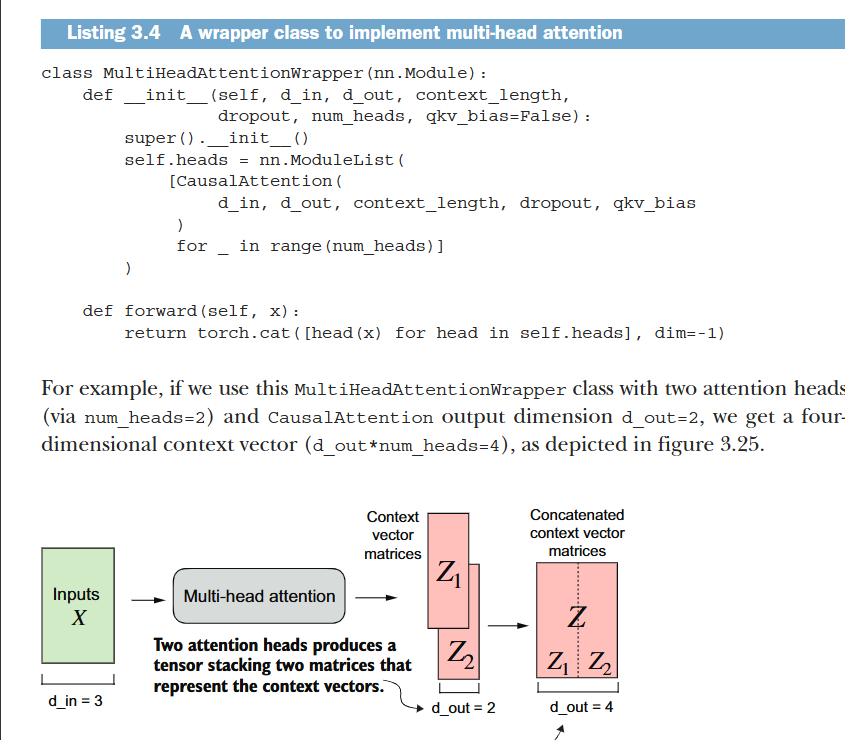

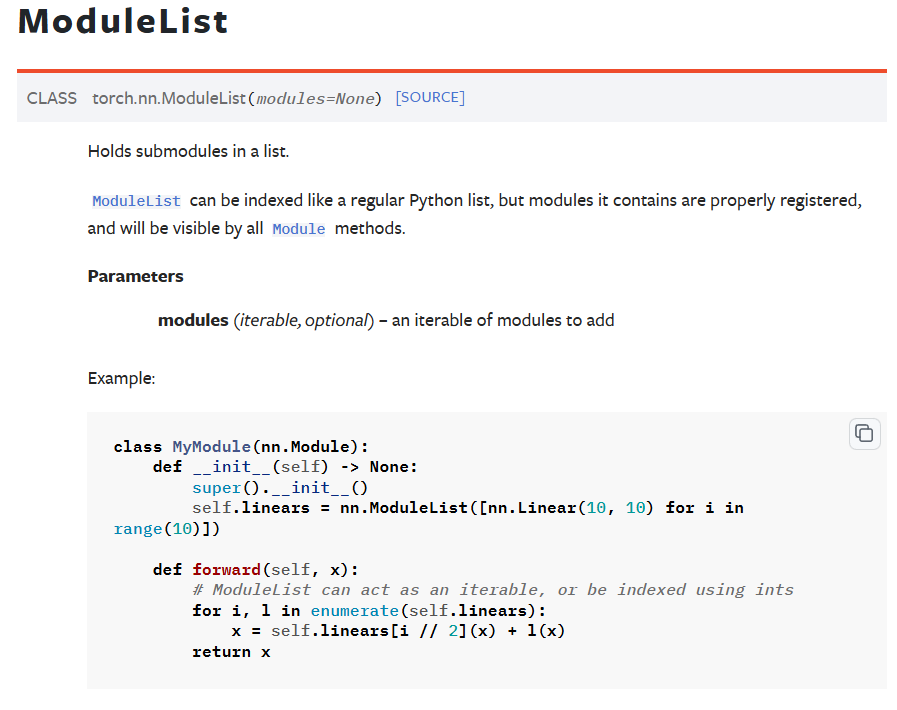

In [219]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads=2, qkv_bias= False):
        super().__init__()
        self.heads= nn.ModuleList([
            CausalAttention(d_in, d_out, context_length, dropout, qkv_bias) for _ in range(num_heads)
        ])

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)

torch.manual_seed(123)

context_length= batch.shape[1]      # 6
d_in, d_out= batch.shape[-1], 2
mha= MultiHeadAttentionWrapper(d_in, d_out, context_length, dropout=0, num_heads=2)
mha(batch)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)

since this is computationally expensive for GPU's, so we use this method

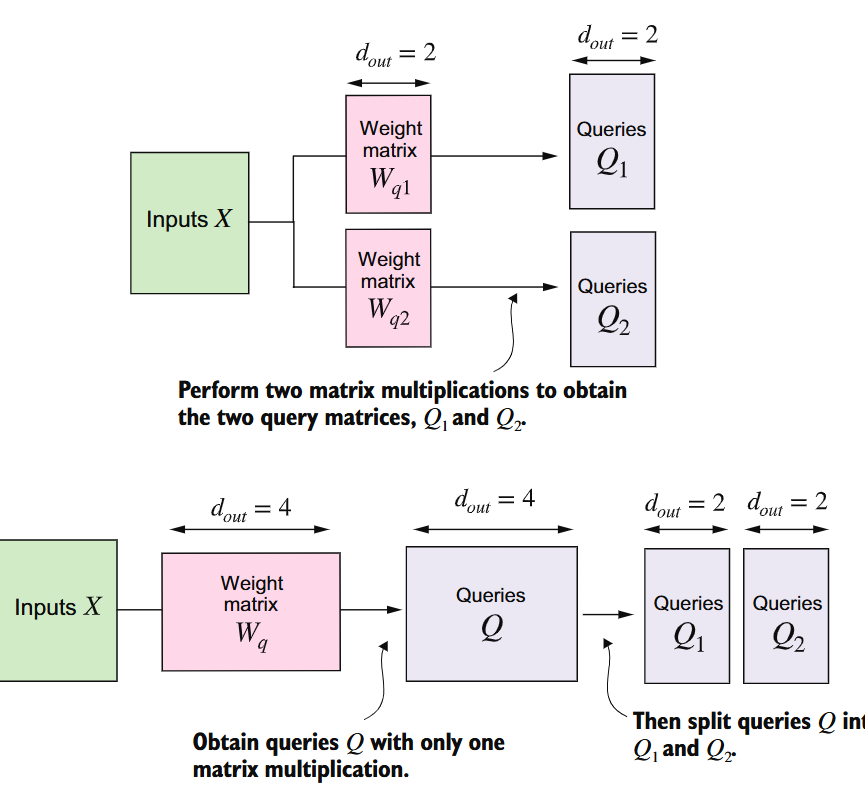

In [220]:
class MultiHeadAttentionClass(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias= False):
        super().__init__()
        assert (d_out % num_heads == 0), "d_out must be divisible by num_heads"
        self.d_out= d_out
        self.d_in= d_in
        self.num_heads= num_heads
        self.head_dim= d_out // num_heads # reduce the dimension of the output vector for each head
        
        self.W_query= torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key= torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value= torch.nn.Linear(d_in, d_out, bias=qkv_bias)

        self.out_proj= torch.nn.Linear(d_out, d_out, bias=qkv_bias)
        self.dropout= torch.nn.Dropout(dropout)
        self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))                # put one above and over the diagonal and rest 0


    def forward(self, x):
        b, num_tokens, d_in= x.shape

        keys= self.W_key(x)        # (2, 6, 3)-> (b, num_tokens, d_out)
        queries= self.W_query(x)
        values= self.W_value(x)

        # we now split the  matrix by adding a "num_heads" dimension
        # unroll last dim: (b, num_tokens, d_out)-> (b, nums_tokens, num_heads, head_dim)
        keys= keys.view(b, num_tokens, self.num_heads, self.head_dim)
        queries= queries.view(b, num_tokens, self.num_heads, self.head_dim)
        values= values.view(b, num_tokens, self.num_heads, self.head_dim)

        # transpose-> (batch, self.num_heads, self.num_tokens, self.head_dim)
        keys= keys.transpose(1, 2)
        queries= queries.transpose(1, 2)
        values= values.transpose(1, 2)

        attn_scores= queries @ keys.transpose(2,3)         # (b, num_heads, num_tokens, head_dim) @ (b, num_heads, head_dim, num_tokens)

        # original mask truncated to the number of tokens and converted to boolean
        mask_bool= self.mask.bool()[:num_tokens, :num_tokens]

        # use the mask to set the upper triangle of the attention scores to -inf
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights= torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights= self.dropout(attn_weights)

        # shape: (b, num_heads, num_tokens, head_dim)
        context_vec= (attn_weights @ values). transpose(1, 2)

        # combine the heads, where self.d_out= self.num_heads * self.head_dim
        context_vec= context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec= self.out_proj(context_vec)     # optional projecton

        return context_vec
    
torch.manual_seed(123)
batch_size, context_length, d_in= 2, 6, 3       # batch.shape
d_out, num_heads= 4, 2  
mha= MultiHeadAttentionClass(d_in, d_out, context_length, dropout=0, num_heads=num_heads)
context_vecs=mha(batch)

context_vecs.shape







torch.Size([2, 6, 4])

Chal bhai, **step-by-step shape analysis and full intuition** dete hain. Is code ka main maksad hai:
**Multi-Head Attention (MHA)** ko implement karna, jahan input embeddings ko query, key, value mein convert karke, multiple attention heads lagaye jaate hain, and finally combined into a final output.

---

### 🔢 Setup Recap:

```python
batch_size = 2
context_length = 6
d_in = 3      # input embedding dim
d_out = 4     # output embedding dim
num_heads = 2 # total heads
```

So each **head** will get:

```python
head_dim = d_out // num_heads = 4 // 2 = 2
```

---

## 🔁 Forward Pass — Step-by-Step with Shapes

### 1️⃣ Input `x`:

```python
x.shape = (2, 6, 3)  # (batch_size, sequence_length, d_in)
```

Each token in the sequence has 3 features. 2 sequences in the batch.

---

### 2️⃣ Linear Projections: Queries, Keys, Values

```python
queries = self.W_query(x)  # (2, 6, 4)
keys    = self.W_key(x)    # (2, 6, 4)
values  = self.W_value(x)  # (2, 6, 4)
```

**Why this shape?**
You're projecting input from `d_in=3` → `d_out=4` for each token. This gives one Q/K/V vector **per token**, per sample in the batch.

---

### 3️⃣ Split into Heads:

```python
queries = queries.view(2, 6, 2, 2)  # (batch, tokens, num_heads, head_dim)
```

We **split last dim (4)** into `(num_heads=2, head_dim=2)`.

Now:

```python
queries = (2, 6, 2, 2)
→ .transpose(1, 2)
→ (2, 2, 6, 2)  # (batch, heads, tokens, head_dim)
```

Do the same for keys and values.

**Why this?**
Each head focuses on a different subspace of features.

---

### 4️⃣ Attention Scores:

```python
attn_scores = queries @ keys.transpose(-2, -1)
→ (2, 2, 6, 2) @ (2, 2, 2, 6) = (2, 2, 6, 6)
```

**Why?**
We compute dot-product similarity between queries and keys, for each head. This tells how much each token should pay attention to others.

Each token attends to **every other token**, hence `6x6` attention matrix.

---

### 5️⃣ Causal Mask:

```python
mask = upper triangular (6, 6) matrix
→ mask[:6, :6] → (6, 6)
→ used to set attn_scores[:, :, :, :] positions to -inf
```

**Why?**
To prevent attending to **future tokens** (causal, like in GPT). Ensures autoregressive property.

---

### 6️⃣ Softmax and Dropout:

```python
attn_weights = softmax(attn_scores / sqrt(head_dim), dim=-1)
→ shape = (2, 2, 6, 6)
→ then dropout (doesn’t change shape)
```

**Why?**
Turn scores into probabilities. Softmax makes sure weights sum to 1 across the sequence.

---

### 7️⃣ Attention Output:

```python
context_vec = attn_weights @ values
→ (2, 2, 6, 6) @ (2, 2, 6, 2)
→ = (2, 2, 6, 2)
```

Each head now gives a context vector (new representation) per token.

---

### 8️⃣ Merge Heads:

```python
context_vec.transpose(1, 2) → (2, 6, 2, 2)
→ .view(2, 6, 4) = (batch, tokens, d_out)
```

You merge back the heads to combine information from each attention subspace.

---

### 9️⃣ Final Projection:

```python
out_proj(context_vec) → still (2, 6, 4)
```

**Why this?**
Just a final transformation—optional. Used to let model learn how to best combine head outputs.

---

## 🔁 Final Output:

```python
context_vecs.shape = (2, 6, 4)
```

---

## 🧠 Intuition Summary:

| Step | What Happens        | Shape                                   | Why It’s Done                 |
| ---- | ------------------- | --------------------------------------- | ----------------------------- |
| 1    | Input               | (B, T, d\_in)                           | Input embeddings              |
| 2    | Q/K/V Linear Layers | (B, T, d\_out)                          | Learn separate Q/K/V          |
| 3    | Split Heads         | (B, T, H, d\_head) → (B, H, T, d\_head) | Parallel attention            |
| 4    | Compute Scores      | (B, H, T, T)                            | How much token i attends to j |
| 5    | Masking             | same                                    | Block future info (causality) |
| 6    | Softmax             | (B, H, T, T)                            | Convert to attention weights  |
| 7    | Apply to Values     | (B, H, T, d\_head)                      | Weighted context vector       |
| 8    | Merge Heads         | (B, T, d\_out)                          | Combine all head outputs      |
| 9    | Output projection   | (B, T, d\_out)                          | Final transformation          |

---

## 🎯 Visual Intuition:

```
Input:        [Token1  Token2  Token3  ... Token6]
               ↓
Linear Proj → Queries / Keys / Values → Split to Heads
               ↓
          Attention Matrix (6x6 per head)
               ↓
        Weighted Sum with Values (per head)
               ↓
        Combine heads → Final output (context)
```

---

Let me know if you want a diagram version or PyTorch shape tracker for debugging — can do both.


Step 1: Linear Projections
```
keys = self.W_key(x)
queries = self.W_query(x)
values = self.W_value(x)
```
All become:

```
keys.shape = queries.shape = values.shape = (2, 6, 8)
```
Why?

You projected input from d_in=3 → d_out=8 using Linear layer

This means each token is now represented in an 8D space

In [221]:
batch

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])

In [222]:
torch.triu(torch.ones(6, 6), diagonal=1)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])